<a href="https://colab.research.google.com/github/swapniel99/erav1s9/blob/develop/S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade torchinfo albumentations

In [2]:
!git clone https://github.com/swapniel99/erav1s9.git
%cd erav1s9/
!git checkout develop
!git pull
%ls

fatal: destination path 'erav1s9' already exists and is not an empty directory.
/content/erav1s9
Already on 'develop'
Your branch is up to date with 'origin/develop'.
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), 335 bytes | 335.00 KiB/s, done.
From https://github.com/swapniel99/erav1s9
   68cdba5..84b3591  develop    -> origin/develop
Updating 68cdba5..84b3591
Fast-forward
 datasets/cifar10.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
assets/      datasets/  __pycache__/  requirements.txt  summary.py
backprop.py  model.py   README.md     S9.ipynb          utils.py


In [3]:
from utils import *
set_seed(42)

Device Selected: cuda


In [4]:
from datasets import CIFAR10
from torchvision import transforms
batch_size = 32
cifar10 = CIFAR10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


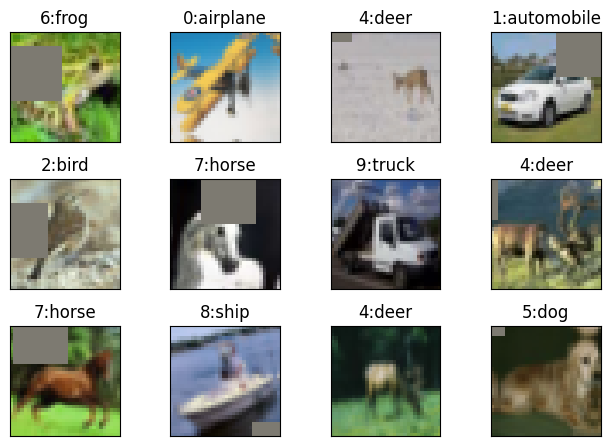

In [5]:
cifar10.show_examples()

In [6]:
from backprop import Experiment

In [7]:
from model import Model

In [8]:
model1 = Model(skip=True, dropout=0.01)
model1.summary(input_size=(batch_size, 3, 32, 32))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model                                    [32, 3, 32, 32]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 3, 32, 32]           [32, 25, 32, 32]          --                             --
│    └─ConvLayer: 2-1                    [32, 3, 32, 32]           [32, 25, 32, 32]          --                             --
│    │    └─Conv2d: 3-1                  [32, 3, 32, 32]           [32, 25, 32, 32]          675                         0.34%
│    │    └─BatchNorm2d: 3-2             [32, 25, 32, 32]          [32, 25, 32, 32]          50                          0.03%
│    │    └─ReLU: 3-3                    [32, 25, 32, 32]          [32, 25, 32, 32]          --                             --
│    │    └─Dropout: 3-4                 [32, 25, 32, 32]          [32, 25, 32, 32]          --                

In [9]:
exp1 = Experiment(model1, cifar10, lr=0.01)
exp1.execute(epochs=100, target=85)

Epoch 1


Train: Average Loss: 1.4650, Accuracy: 46.80: 100%|██████████| 1563/1563 [00:44<00:00, 35.48it/s]


Test:  Average loss: 1.2114, Accuracy: 57.58
Epoch 2


Train: Average Loss: 1.1041, Accuracy: 60.70: 100%|██████████| 1563/1563 [00:42<00:00, 36.95it/s]


Test:  Average loss: 0.8971, Accuracy: 68.61
Epoch 3


Train: Average Loss: 0.9565, Accuracy: 66.22: 100%|██████████| 1563/1563 [00:42<00:00, 36.38it/s]


Test:  Average loss: 0.7881, Accuracy: 72.28
Epoch 4


Train: Average Loss: 0.8745, Accuracy: 69.34: 100%|██████████| 1563/1563 [00:43<00:00, 36.17it/s]


Test:  Average loss: 0.7392, Accuracy: 74.57
Epoch 5


Train: Average Loss: 0.8118, Accuracy: 71.60: 100%|██████████| 1563/1563 [00:43<00:00, 36.34it/s]


Test:  Average loss: 0.7187, Accuracy: 74.65
Epoch 6


Train: Average Loss: 0.7702, Accuracy: 73.27: 100%|██████████| 1563/1563 [00:43<00:00, 36.19it/s]


Test:  Average loss: 0.6553, Accuracy: 76.84
Epoch 7


Train: Average Loss: 0.7318, Accuracy: 74.28: 100%|██████████| 1563/1563 [00:43<00:00, 36.10it/s]


Test:  Average loss: 0.6380, Accuracy: 77.93
Epoch 8


Train: Average Loss: 0.7077, Accuracy: 75.29: 100%|██████████| 1563/1563 [00:43<00:00, 36.29it/s]


Test:  Average loss: 0.5993, Accuracy: 79.68
Epoch 9


Train: Average Loss: 0.6756, Accuracy: 76.43: 100%|██████████| 1563/1563 [00:43<00:00, 35.78it/s]


Test:  Average loss: 0.5823, Accuracy: 79.98
Epoch 10


Train: Average Loss: 0.6558, Accuracy: 77.33: 100%|██████████| 1563/1563 [00:43<00:00, 36.18it/s]


Test:  Average loss: 0.5830, Accuracy: 79.60
Epoch 11


Train: Average Loss: 0.6385, Accuracy: 77.84: 100%|██████████| 1563/1563 [00:43<00:00, 36.33it/s]


Test:  Average loss: 0.5361, Accuracy: 81.52
Epoch 12


Train: Average Loss: 0.6200, Accuracy: 78.32: 100%|██████████| 1563/1563 [00:43<00:00, 36.09it/s]


Test:  Average loss: 0.5197, Accuracy: 81.88
Epoch 13


Train: Average Loss: 0.6033, Accuracy: 78.93: 100%|██████████| 1563/1563 [00:42<00:00, 36.47it/s]


Test:  Average loss: 0.5519, Accuracy: 81.42
Epoch 14


Train: Average Loss: 0.5903, Accuracy: 79.45: 100%|██████████| 1563/1563 [00:43<00:00, 36.31it/s]


Test:  Average loss: 0.5009, Accuracy: 82.87
Epoch 15


Train: Average Loss: 0.5731, Accuracy: 80.01: 100%|██████████| 1563/1563 [00:42<00:00, 36.57it/s]


Test:  Average loss: 0.4971, Accuracy: 83.13
Epoch 16


Train: Average Loss: 0.5603, Accuracy: 80.36: 100%|██████████| 1563/1563 [00:43<00:00, 36.29it/s]


Test:  Average loss: 0.5140, Accuracy: 82.50
Epoch 17


Train: Average Loss: 0.5482, Accuracy: 80.92: 100%|██████████| 1563/1563 [00:42<00:00, 36.55it/s]


Test:  Average loss: 0.4894, Accuracy: 83.15
Epoch 18


Train: Average Loss: 0.5415, Accuracy: 81.04: 100%|██████████| 1563/1563 [00:43<00:00, 36.32it/s]


Test:  Average loss: 0.5043, Accuracy: 82.96
Epoch 19


Train: Average Loss: 0.5276, Accuracy: 81.60: 100%|██████████| 1563/1563 [00:42<00:00, 36.61it/s]


Test:  Average loss: 0.4819, Accuracy: 83.65
Epoch 20


Train: Average Loss: 0.5146, Accuracy: 81.98: 100%|██████████| 1563/1563 [00:42<00:00, 36.47it/s]


Test:  Average loss: 0.4841, Accuracy: 83.63
Epoch 21


Train: Average Loss: 0.5083, Accuracy: 82.15: 100%|██████████| 1563/1563 [00:44<00:00, 35.51it/s]


Test:  Average loss: 0.4759, Accuracy: 83.88
Epoch 22


Train: Average Loss: 0.5099, Accuracy: 82.09: 100%|██████████| 1563/1563 [00:43<00:00, 35.73it/s]


Test:  Average loss: 0.4820, Accuracy: 83.46
Epoch 23


Train: Average Loss: 0.4945, Accuracy: 82.86: 100%|██████████| 1563/1563 [00:43<00:00, 35.77it/s]


Test:  Average loss: 0.4465, Accuracy: 84.80
Epoch 24


Train: Average Loss: 0.4843, Accuracy: 83.09: 100%|██████████| 1563/1563 [00:44<00:00, 35.43it/s]


Test:  Average loss: 0.4631, Accuracy: 84.51
Epoch 25


Train: Average Loss: 0.4806, Accuracy: 83.34: 100%|██████████| 1563/1563 [00:43<00:00, 35.76it/s]


Test:  Average loss: 0.4851, Accuracy: 84.05
Epoch 00025: reducing learning rate of group 0 to 1.0000e-03.
Epoch 26


Train: Average Loss: 0.4306, Accuracy: 85.01: 100%|██████████| 1563/1563 [00:43<00:00, 35.84it/s]


Test:  Average loss: 0.4085, Accuracy: 86.40
Epoch 27


Train: Average Loss: 0.4139, Accuracy: 85.71: 100%|██████████| 1563/1563 [00:43<00:00, 35.91it/s]


Test:  Average loss: 0.4050, Accuracy: 86.60
Epoch 28


Train: Average Loss: 0.4084, Accuracy: 85.85: 100%|██████████| 1563/1563 [00:43<00:00, 35.73it/s]


Test:  Average loss: 0.4024, Accuracy: 86.68
Target Validation accuracy achieved thrice. Stopping Training.


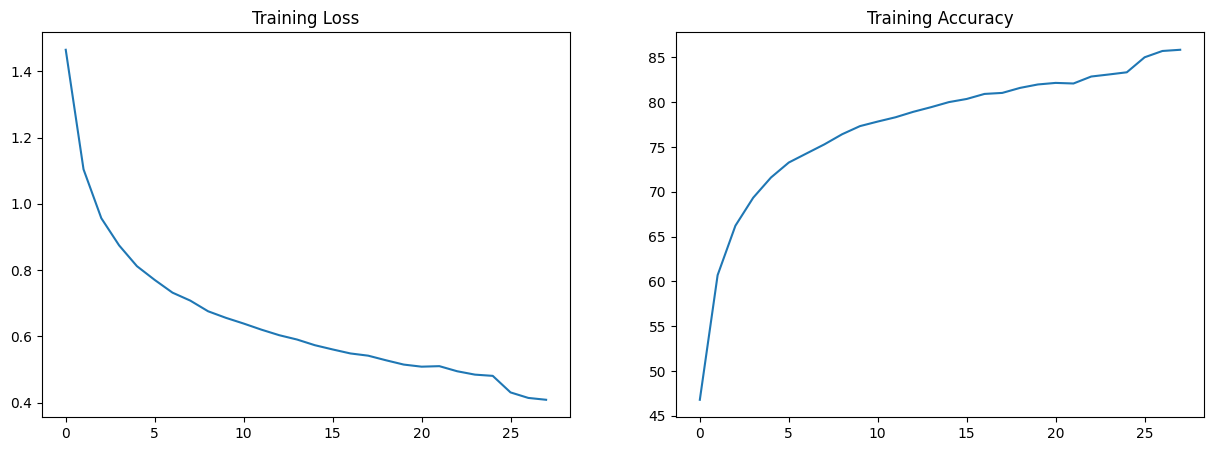

In [10]:
exp1.train.plot_stats()

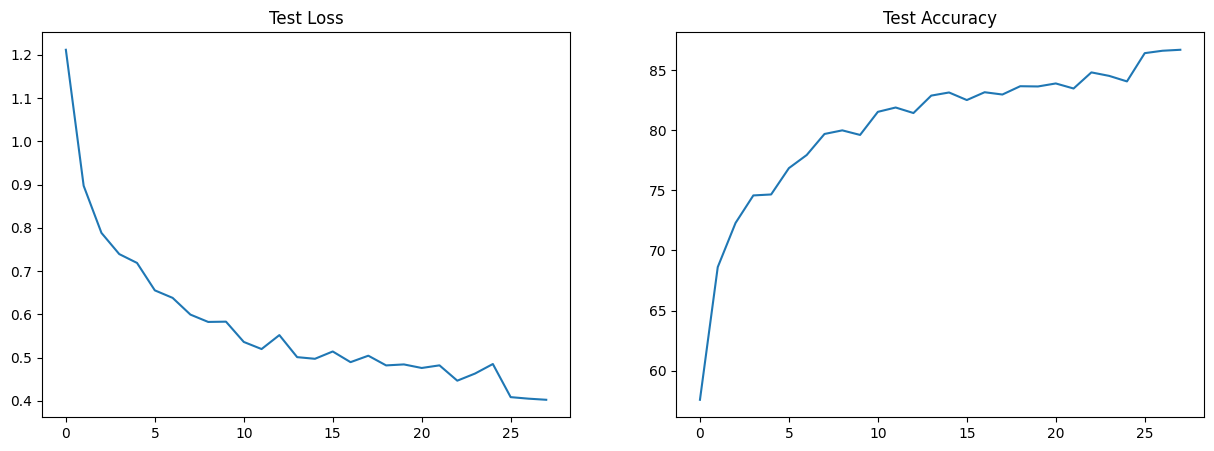

In [11]:
exp1.test.plot_stats()

Test:  Average loss: 0.4024, Accuracy: 86.68


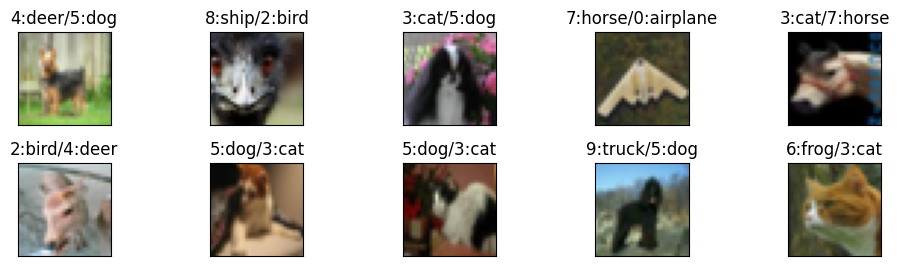

In [12]:
exp1.show_incorrect()